In [ ]:
# !pip install geopandas
# !pip install imbalanced-learn
# !pip install -u scikit-learn

In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# data = pd.read_csv('/Users/lucas/Data/US_Accidents_March23.csv')
data = pd.read_csv('/Users/lucaswin/Data/US_Accidents_March23.csv')

In [27]:
df = data
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [28]:
print(df.shape)
print(df.info())

(7728394, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humi

In [ ]:
# accidents_cities = df['City'].value_counts()
# accidents_cities

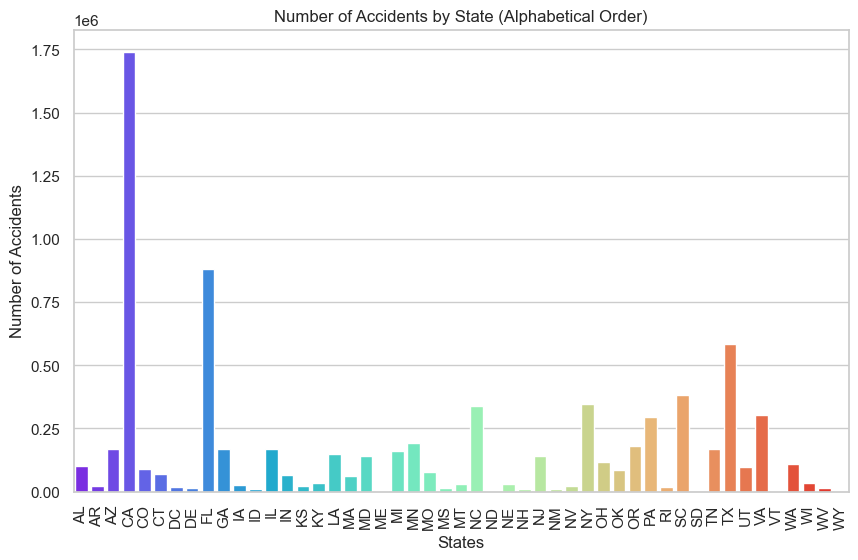

In [29]:
# accidents_states = df['State'].value_counts()
# # accidents_states
# plt.figure(figsize=(10, 6))
# accidents_states.plot(kind='bar')
# plt.xlabel('States')
# plt.ylabel('Number of Accidents')
# plt.title('Number of Accidents by State')
# plt.xticks(rotation=90)
# plt.show()

accidents_states = df['State'].value_counts()
state_order = sorted(accidents_states.index)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', order=state_order, palette='rainbow')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by State (Alphabetical Order)')
plt.xticks(rotation=90)
plt.show()

# Accidents in California

In [30]:
df_ca = df[df['State'] == 'CA']
# print(df_ca.info())

In [31]:
columns_to_remove = ['ID', 'Source', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
                     'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 
                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_ca_cleaned = df_ca.drop(columns=columns_to_remove)
df_ca_cleaned = df_ca_cleaned.dropna()
df_ca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120091 entries, 6040 to 7728393
Data columns (total 28 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1120091 non-null  int64  
 1   Start_Time         1120091 non-null  object 
 2   Street             1120091 non-null  object 
 3   City               1120091 non-null  object 
 4   County             1120091 non-null  object 
 5   Zipcode            1120091 non-null  object 
 6   Temperature(F)     1120091 non-null  float64
 7   Wind_Chill(F)      1120091 non-null  float64
 8   Humidity(%)        1120091 non-null  float64
 9   Pressure(in)       1120091 non-null  float64
 10  Visibility(mi)     1120091 non-null  float64
 11  Wind_Speed(mph)    1120091 non-null  float64
 12  Precipitation(in)  1120091 non-null  float64
 13  Weather_Condition  1120091 non-null  object 
 14  Amenity            1120091 non-null  bool   
 15  Bump               1120091 no

In [32]:
print(df_ca_cleaned['Street'].nunique())

55572


### Severity Distribution

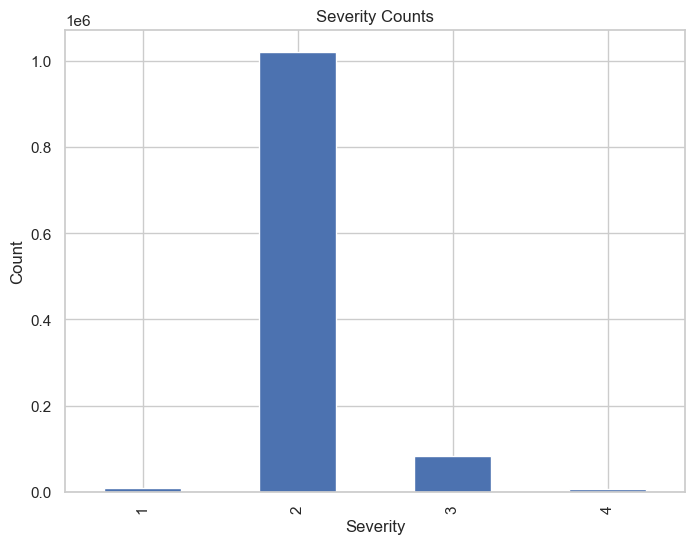

In [33]:
severity_counts = df_ca_cleaned['Severity'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Counts')
plt.show()

In [34]:
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Rain|Drizzle|Shower|Precipitation", na=False), "Weather_Condition"] = "Rain"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Cloudy|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Fog|Mist", na=False), "Weather_Condition"] = "Fog"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Clear|Fair", na=False), "Weather_Condition"] = "Clear"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"

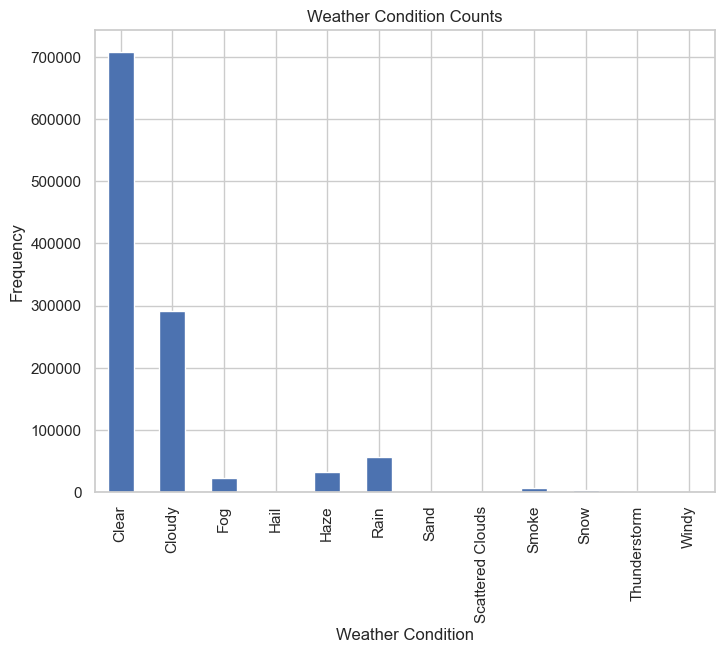

In [35]:
weather_condition_counts = df_ca_cleaned['Weather_Condition'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
weather_condition_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.show()

# Correlation Matrix

In [49]:
selected_columns = ['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)','Pressure(in)', 
                    'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
corr_mat = df_ca_cleaned[selected_columns].corr()
corr_mat

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Severity,1.000000,0.038692,0.039408,0.010236,0.018805,0.000258,-0.003960,0.003851
Temperature(F),0.038692,1.000000,0.996813,-0.658858,0.056817,0.212478,0.226796,-0.097160
Wind_Chill(F),0.039408,0.996813,1.000000,-0.652145,0.079026,0.215858,0.203204,-0.101631
Humidity(%),0.010236,-0.658858,-0.652145,1.000000,0.125075,-0.345065,-0.228897,0.149978
Pressure(in),0.018805,0.056817,0.079026,0.125075,1.000000,0.051723,-0.069265,-0.030619
Visibility(mi),0.000258,0.212478,0.215858,-0.345065,0.051723,1.000000,0.075179,-0.217109
Wind_Speed(mph),-0.003960,0.226796,0.203204,-0.228897,-0.069265,0.075179,1.000000,0.070230
Precipitation(in),0.003851,-0.097160,-0.101631,0.149978,-0.030619,-0.217109,0.070230,1.000000


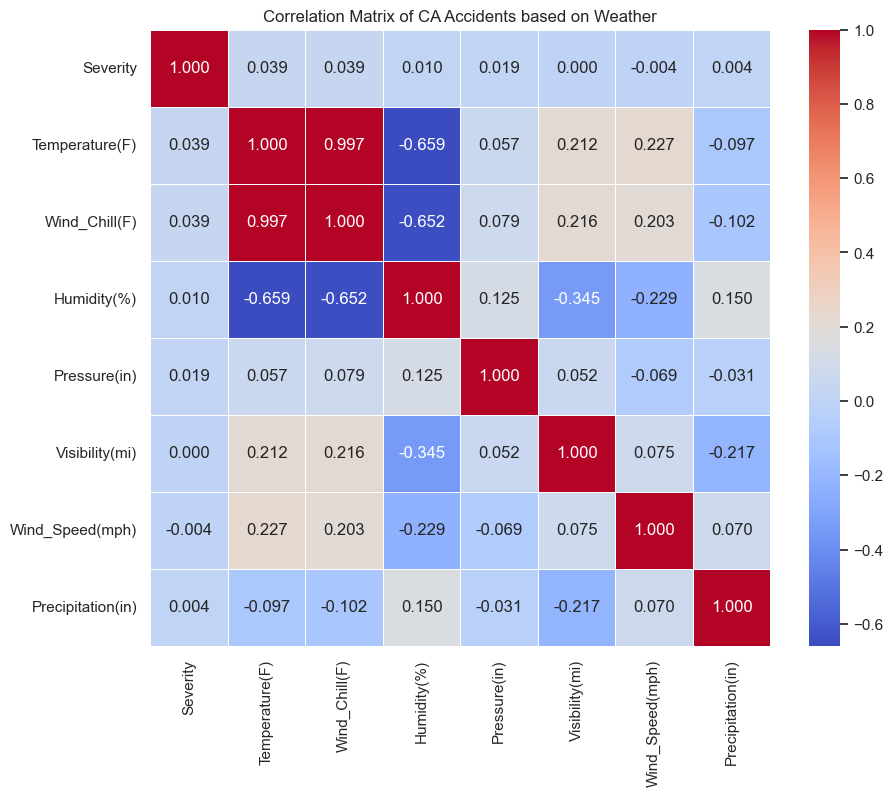

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of CA Accidents based on Weather')
plt.show()

In [51]:
selected_columns_2 = ['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
corr_mat_2 = df_ca_cleaned[selected_columns_2].corr()
corr_mat_2

,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,1.000000,-0.016829,-0.000909,-0.038785,-0.007199,0.031823,-0.000649,0.005857,-0.001282,-0.011098,-0.033086,-0.003508,-0.032279
Amenity,-0.016829,1.000000,0.006210,0.133305,0.018038,-0.028084,0.003102,0.026908,-0.000467,0.117531,0.052627,0.013557,0.089009
Bump,-0.000909,0.006210,1.000000,0.028057,0.002703,-0.001877,-0.000906,-0.001250,-0.000138,0.003244,0.026829,0.828794,-0.002478
Crossing,-0.038785,0.133305,0.028057,1.000000,0.085578,-0.067353,0.019591,0.220586,-0.001231,0.163332,0.147934,0.056050,0.434119
Give_Way,-0.007199,0.018038,0.002703,0.085578,1.000000,-0.011572,0.000200,0.009202,0.004541,0.005432,0.060607,0.003398,0.033268
Junction,0.031823,-0.028084,-0.001877,-0.067353,-0.011572,1.000000,0.002994,-0.016418,0.005390,-0.040320,-0.047174,-0.004244,-0.079718
No_Exit,-0.000649,0.003102,-0.000906,0.019591,0.000200,0.002994,1.000000,0.004199,-0.000176,0.002798,0.010631,-0.001093,0.008978
Railway,0.005857,0.026908,-0.001250,0.220586,0.009202,-0.016418,0.004199,1.000000,-0.000510,0.149575,0.015567,0.023332,0.042382
Roundabout,-0.001282,-0.000467,-0.000138,-0.001231,0.004541,0.005390,-0.000176,-0.000510,1.000000,-0.000797,0.002814,-0.000166,-0.000771
Station,-0.011098,0.117531,0.003244,0.163332,0.005432,-0.040320,0.002798,0.149575,-0.000797,1.000000,0.049212,0.003725,0.186533


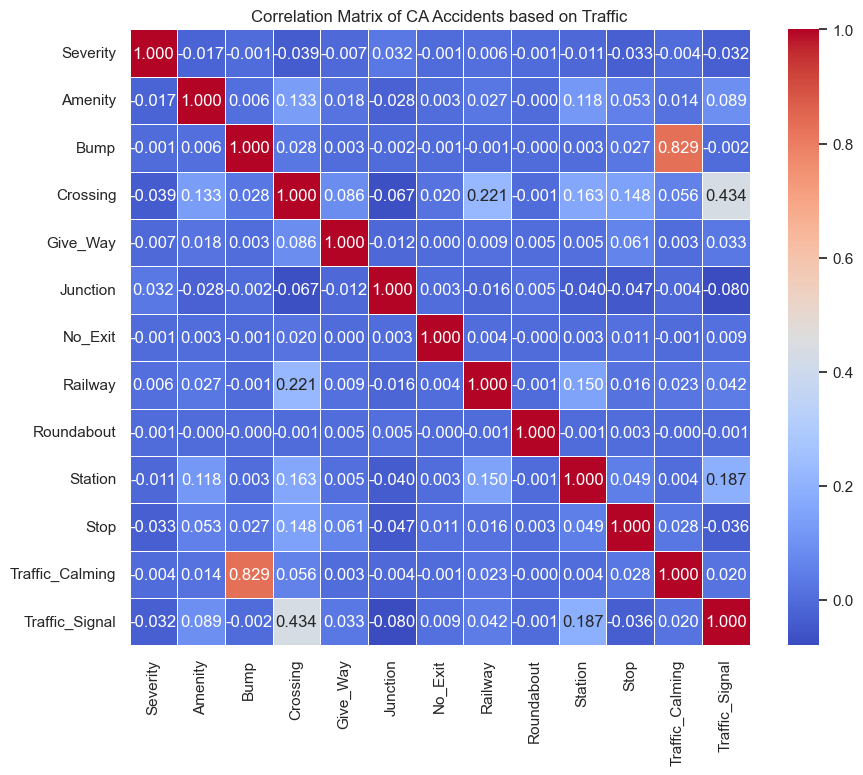

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat_2, annot=True, fmt='.3f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of CA Accidents based on Traffic')
plt.show()

# Accident Frequency Analysis 

### Location-Based Analysis

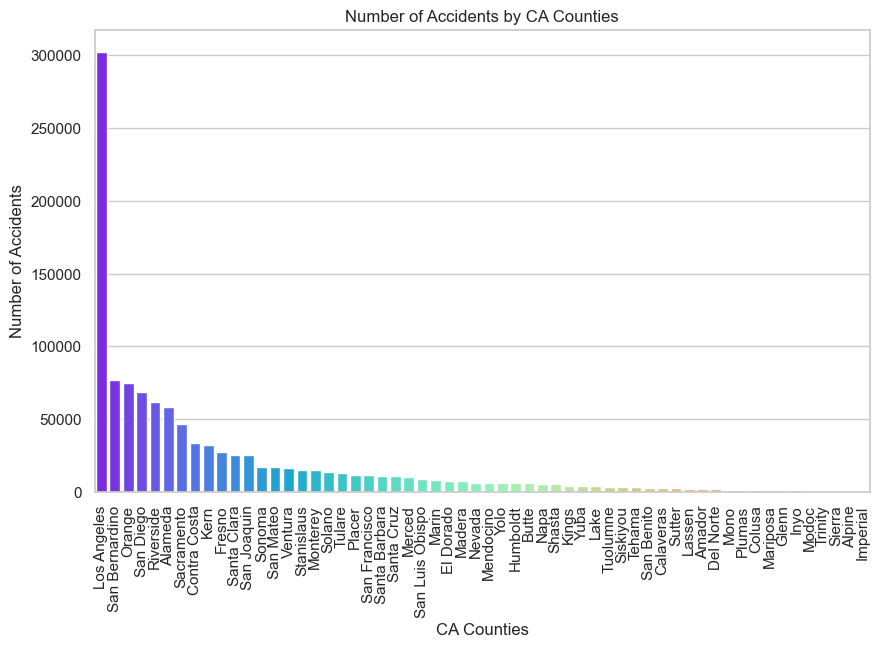

In [53]:
# accidents_ca_county = df_ca_cleaned['County'].value_counts()

# plt.figure(figsize=(10, 6))
# accidents_ca_county.plot(kind='bar')
# plt.xlabel('CA Counties')
# plt.ylabel('Number of Accidents')
# plt.title('Number of Accidents by CA Counties')
# plt.xticks(rotation=90)
# plt.show()

accidents_ca_county = df_ca_cleaned['County'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_ca_county.index, y=accidents_ca_county.values, palette="rainbow")

plt.xlabel('CA Counties')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by CA Counties')
plt.xticks(rotation=90)
plt.show()

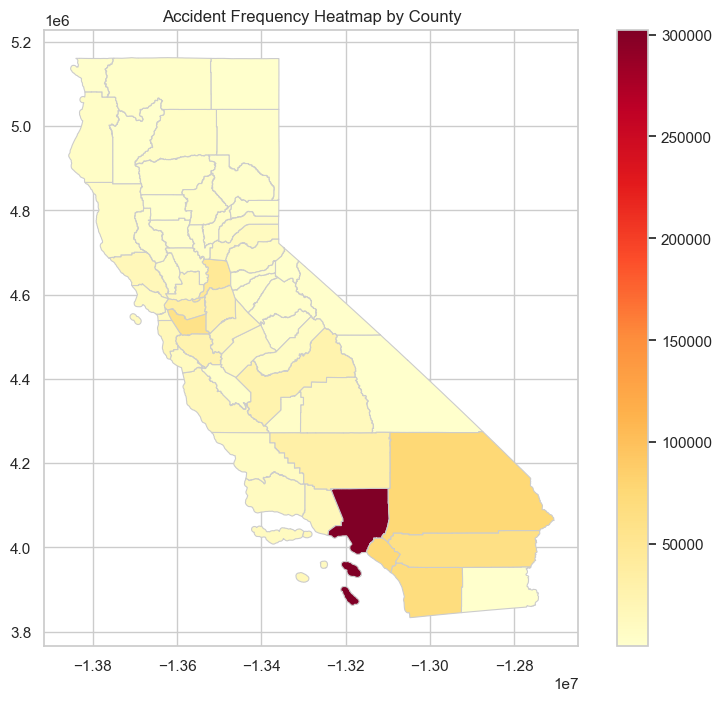

In [54]:
counties_shapefile = gpd.read_file('./CA_Counties/CA_Counties_TIGER2016.shp')
merged_data = counties_shapefile.merge(accidents_ca_county, left_on='NAME', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='County', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Accident Frequency Heatmap by County')
plt.show()

### Time-Based Analysis

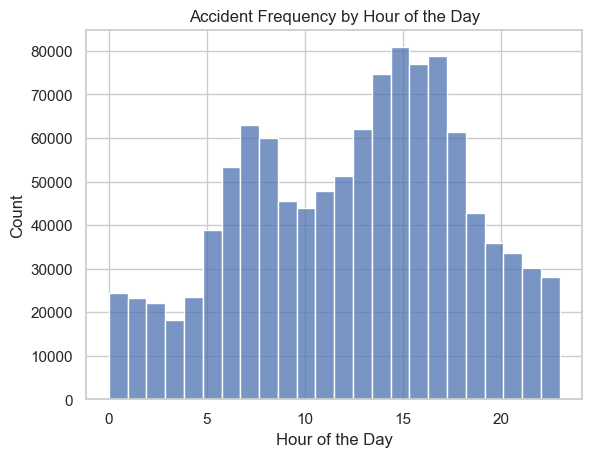

In [55]:
df_ca_cleaned['Hour'] = pd.to_datetime(df_ca_cleaned['Start_Time']).dt.hour
hourly_accident_freq = df_ca_cleaned['Hour'].value_counts().sort_index()

# hourly_accident_freq.plot(kind='line', figsize=(10, 6), color='r')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Accident Frequency')
# plt.title('Accident Frequency by Hour of the Day')
# plt.show()

sns.histplot(data=df_ca_cleaned, x='Hour', bins=24)
# sns.lineplot(data=hourly_accident_freq, color='r')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Accident Frequency by Hour of the Day')
plt.show()

### Weather-Based Analysis

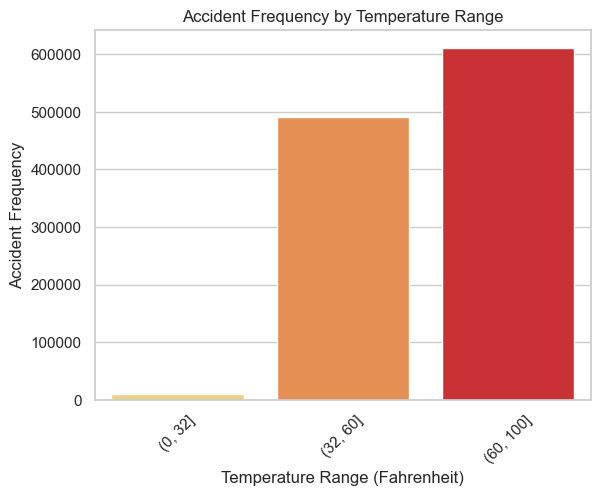

In [56]:
# temperature_ranges = pd.cut(df_ca_cleaned['Temperature(F)'], bins=[0, 32, 60, 100])
# temperature_accident_freq = df_ca_cleaned.groupby(temperature_ranges).size()

# temperature_accident_freq.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Temperature Range (Fahrenheit)')
# plt.ylabel('Accident Frequency')
# plt.title('Accident Frequency by Temperature Range')
# plt.show()

temperature_ranges = pd.cut(df_ca_cleaned['Temperature(F)'], bins=[0, 32, 60, 100])
temperature_accident_freq = df_ca_cleaned.groupby(temperature_ranges).size().reset_index(name='Accident Frequency')

sns.barplot(data=temperature_accident_freq, x='Temperature(F)', y='Accident Frequency', palette='YlOrRd')
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Accident Frequency')
plt.title('Accident Frequency by Temperature Range')
plt.xticks(rotation=45)
plt.show()

# Weather Impact Analysis

In [57]:
# weather_cols = ['Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Visibility(mi)', 'Severity']
# weather_df = df_ca_cleaned[weather_cols]
# sns.pairplot(weather_df, hue='Severity')
# plt.title('Weather Impact on Accident Severity')
# plt.show()

# Baseline Prediction

In [58]:
# categorical_cols = ['Street', 'City', 'County', 'Zipcode', 'Weather_Condition', 'Sunrise_Sunset']
# label_encoder = LabelEncoder()
# for col in categorical_cols:
#     df_ca_cleaned[col] = label_encoder.fit_transform(df_ca_cleaned[col])

# X = df_ca_cleaned.drop('Severity', axis=1)
# y = df_ca_cleaned['Severity']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# Severity Prediction with Weather Condition

In [60]:
X = df_ca_cleaned[['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                   'Visibility(mi)', 'Precipitation(in)']]
y = df_ca_cleaned['Severity']

# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smote_enn.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.84      0.84      0.84    204362
           2       0.81      0.85      0.83    204264
           3       0.74      0.70      0.72    204684
           4       0.87      0.87      0.87    204136

    accuracy                           0.81    817446
   macro avg       0.81      0.81      0.81    817446
weighted avg       0.81      0.81      0.81    817446



In [62]:
# new_instance = [[75.0, 60, 10.0, 0.1]]
# severity_prediction = rfc.predict(new_instance)
# print("Severity prediction:", severity_prediction)

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# for i in range(1, 6):
#     print('K: ', i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_scaled, y_train)

#     y_pred = knn.predict(X_test_scaled)
#     print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           1       0.77      0.90      0.83    204362
           2       0.68      0.86      0.76    204264
           3       0.72      0.53      0.61    204684
           4       0.92      0.76      0.83    204136

    accuracy                           0.76    817446
   macro avg       0.77      0.76      0.76    817446
weighted avg       0.77      0.76      0.76    817446



In [ ]:
# new_instance = [[78.0, 54, 10.0, 0.00]]
# severity_prediction = knn.predict(new_instance)
# print("Severity prediction:", severity_prediction)

In [ ]:
# rfc_scores = cross_val_score(rfc, X, y, cv=5, scoring='accuracy')
# print('RFC Cross-Validation Scores:', rfc_scores)
# print('RFC Mean Cross-Validation Accuracy:', rfc_scores.mean())

In [ ]:
# knn_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
# print('KNN Cross-Validation Scores:', knn_scores)
# print('KNN Mean Cross-Validation Accuracy:', knn_scores.mean())